In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

In [4]:
data = np.loadtxt("machine-learning-ex1/ex1/ex1data1.txt", delimiter=',')

In [5]:
X = np.c_[np.ones(data.shape[0]), data[:,0]]
y = data[:,1]

Text(0,0.5,u'profit')

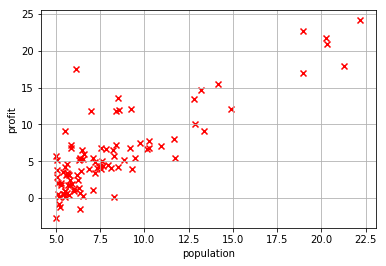

In [6]:
plt.scatter(X[:,1], y, marker = "x", color="r")
plt.grid(True)
plt.xlabel("population")
plt.ylabel("profit")

In [14]:
def compute_cost(X, y, theta=[0,0]):
    m = y.size
    h = X.dot(theta)
    J = 1.0/(2*m)*np.sum(np.square(h-y))
    return J

In [15]:
compute_cost(X,y)

32.072733877455676

### Batch Gradient Descent

In [9]:
def gradient_descent(X, y, theta=[0,0], alpha=0.01, num_iters=1500):
    m = y.size #number of obseravations
    cost_history = np.zeros(num_iters) 
    
    for i in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*np.dot((h-y).T, X)
        cost_history[i] = compute_cost(X, y, theta)
    return(theta, cost_history)

In [10]:
theta , cost_J = gradient_descent(X, y, theta=[0.1, 0.1])

In [11]:
print theta

[-3.62434423  1.16576489]


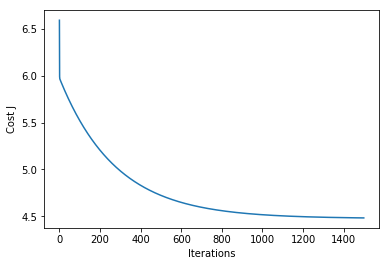

In [12]:
plt.plot(cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

### Graph linear regression fitting result

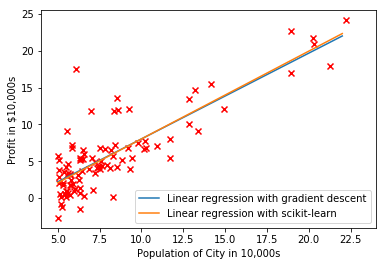

In [13]:
xx = np.arange(5,23) # the approximate range of x 
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y,  c='r', marker='x')
plt.plot(xx,yy, label='Linear regression with gradient descent')

# Plot result with scikit learn
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1),y)
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression with scikit-learn')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc="lower right")

In [13]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1,4,100)
J_vals = np.zeros((theta_0.size, theta_1.size))
for i in range(theta_0.size):
    for j in range(theta_1.size):
        t = [theta_0[i], theta_1[j]]
        J_vals[i,j] = compute_cost(X, y, t)

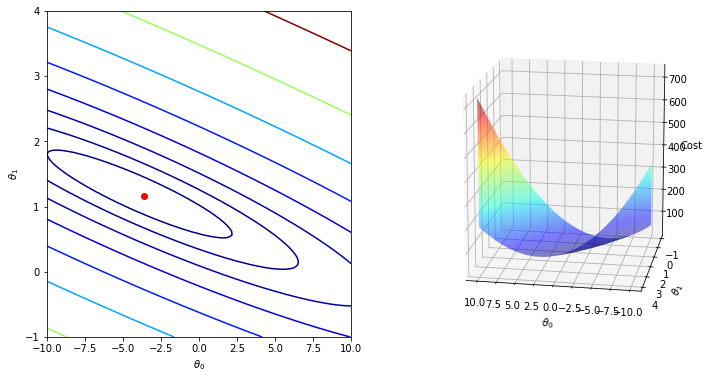

In [17]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

ax1.contour(theta_0, theta_1, J_vals.T, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

ax2.plot_surface(theta_0, theta_1, J_vals, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.view_init(elev=15, azim=100)

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')

## Multiple Variable Linear Regression

In [23]:
data2 = np.loadtxt("machine-learning-ex1/ex1/ex1data2.txt", delimiter=',')

In [51]:
X2 =data2[:, [0,1]]
y2 = data2[:,2]
X2.shape

(47, 2)

In [52]:
def feature_normalize(X):
    return np.divide((X - np.mean(X,axis=0)),np.std(X,axis=0))

In [53]:
X2_norm = feature_normalize(X2)

In [64]:
print X2_norm[:5,:]

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


In [65]:
X2_norm_2 = np.c_[np.ones(X2.shape[0]), X2_norm]
print X2_norm_2.shape

(47, 3)


In [66]:
def compute_cost_multi(X, y, theta):
    h = X.dot(theta)
    m = y.size
    return 1.0/(2*m) * np.sum(np.square((h-y)))

In [67]:
compute_cost_multi(X2_norm_2, y, np.array([0,0,0]).reshape(-1,1))

1507.4184922404163

In [99]:
def gradient_descent_multi(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size #number of obseravations
    cost_history = np.zeros(num_iters) 
    
    for i in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*np.dot(X.T, (h-y))
        cost_history[i] = compute_cost_multi(X, y, theta)
    return(theta, cost_history)

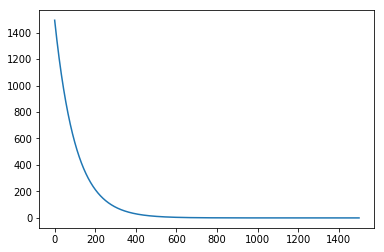

In [100]:
theta, cost_history = gradient_descent_multi(X2_norm_2, y, np.array([0,0,0]).reshape(-1,1))
plt.plot(cost_history)

### Normal Equations

In [81]:
def normal_equation(X,y):
    return np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))

In [97]:
X2_2 = np.c_[np.ones(X2.shape[0]), X2]
theta = normal_equation(X2_2, y2)


In [98]:
print "Prediction for price of house with 1650 square feet and 3 bedrooms is "
print "$%0.2f" % float(np.dot(theta, np.array([1, 1650.0,  3.0])))

Prediction for price of house with 1650 square feet and 3 bedrooms is 
$293081.46
